In [28]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import accuracy_score

### Linear regression 

In [29]:
wines = pd.read_csv('wines_properties.csv')
wines.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [30]:
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [31]:
linreg_y = wines['Alcohol']

In [32]:
model = sm.OLS(linreg_y, sm.add_constant(wines.iloc[:, 1:], prepend = True), hasconst = True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     20.32
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           7.07e-28
Time:                        18:15:18   Log-Likelihood:                -129.56
No. Observations:                 178   AIC:                             287.1
Df Residuals:                     164   BIC:                             331.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.6359      0.762     16.574      0.000      11.130      14.141
Malic_Acid               0.1389      0.044      3.146      0.002       0.052       0.226
Ash                      0.0568      0.213      0.267      0.790      -0.363       0.477
Ash_Alcanity            -0.0160      0.019     -0.857      0.393      -0.053       0.021
Magnesium               -0.0002      0.003     -0.072      0.942      -0.007       0.006
Total_Phenols            0.1201      0.132      0.908      0.365      -0.141       0.381
Flavanoids              -0.1747      0.119     -1.465      0.145      -0.410       0.061
Nonflavanoid_Phenols    -0.3452      0.424     -0.813      0.417      -1.183       0.493
Proanthocyanins         -0.1243      0.096     -1.294      0.197      -0.314       0.065
Color_Intensity          0.1909      0.028      6.785      0.000       0.135       0.246
Hue                      0.1309      0.275      0.476      0.635      -0.412       0.674
OD280                    0.0186      0.116      0.161      0.873      -0.210       0.247
Proline                  0.0006      0.000      2.631      0.009       0.000       0.001
Customer_Segment        -0.4922      0.155     -3.166      0.002      -0.799      -0.185
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.834
Skew:                           0.168   Prob(JB):                        0.659
Kurtosis:                       2.997   Cond. No.                     1.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
y_linreg_pred = res.predict(sm.add_constant(wines.iloc[:, 1:], prepend = True)) #predictions based on OLS

#### Result
We obtain R-squared equal to the 0.617, which means that with the use of our model we were able to explain more than 60% of the variation of the alcohol percentage. However, if we wish to compare our model to other models, we should look at the adjusted R-squared that, as expected, is lower, but only by 3% in our case.

### Logistic regression 

In [34]:
alcohol_threshold = np.percentile(wines.Alcohol, 75) #choose 75% percentile as a threshold
alcohol_bool = list(map(int, linreg_y > alcohol_threshold))
wines['Strong'] = alcohol_bool
wines = wines.drop(labels = ['Alcohol'], axis = 1)
wines.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Strong
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0


In [48]:
logit = sm.Logit(wines.iloc[:, -1], sm.add_constant(wines.iloc[:, :-1], prepend = True), hasconst = True)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.332412
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Strong   No. Observations:                  178
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                           13
Date:                Wed, 12 Dec 2018   Pseudo R-squ.:                  0.4121
Time:                        18:22:08   Log-Likelihood:                -59.169
converged:                       True   LL-Null:                       -100.64
                                        LLR p-value:                 3.072e-12
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.1909      5.671     -2.503      0.012     -25.305      -3.077
Malic_Acid               0.6919      0.305      2.270      0.023       0.094       1.289
Ash                      0.4460      1.352      0.330      0.741      -2.203       3.095
Ash_Alcanity            -0.1208      0.115     -1.052      0.293      -0.346       0.104
Magnesium               -0.0163      0.023     -0.719      0.472      -0.061       0.028
Total_Phenols            1.1710      1.008      1.162      0.245      -0.804       3.146
Flavanoids              -0.5495      0.838     -0.656      0.512      -2.191       1.092
Nonflavanoid_Phenols     2.6239      3.163      0.830      0.407      -3.576       8.823
Proanthocyanins         -0.3442      0.703     -0.489      0.625      -1.723       1.034
Color_Intensity          0.7456      0.231      3.228      0.001       0.293       1.198
Hue                      3.8818      2.154      1.802      0.072      -0.341       8.104
OD280                    1.2646      0.788      1.606      0.108      -0.279       2.808
Proline                  0.0022      0.001      1.489      0.137      -0.001       0.005
Customer_Segment        -0.4634      1.014     -0.457      0.648      -2.450       1.523
========================================================================================
"""

In [49]:
pred = np.array([1-result.predict(), result.predict()])
pred.T.shape

(178, 2)

In [50]:
accuracy_score(pred[1]>0.5, wines['Strong'])

0.8595505617977528

#### Result
By setting the classification threshold at the probability of the wine being strong equal to 0.5, we get the accuracy score of 86%. At the first glance, this might seem as a very good result, but we should keep in mind that the ratio of classes is 3:1, and, thus, just by assigning all observations to the 0 class we would get the accuracy of 75%. Hence, we should pay attention only to the increase of accuracy beyond that value.

We can also try to plot lift curve and cumulative gains for this model to check whether it is good or bad in general. As we see
fitted model's quality is quite high

C:\Users\knyag\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\knyag\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\knyag\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


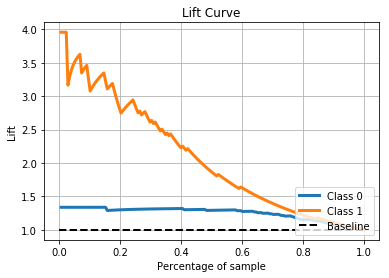

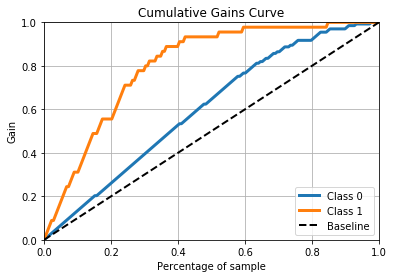

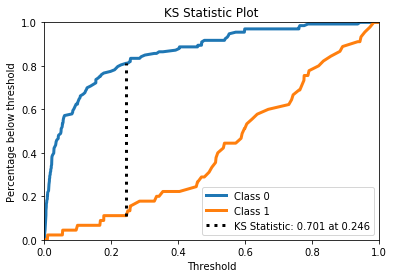

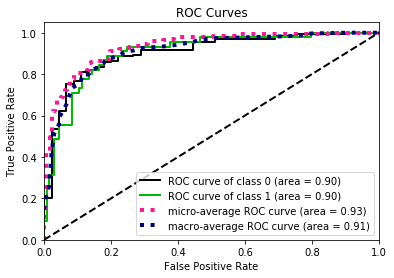

In [38]:
import scikitplot as skplt
skplt.metrics.plot_lift_curve(wines['Strong'], pred.T)
skplt.metrics.plot_cumulative_gain(wines['Strong'], pred.T)
skplt.metrics.plot_ks_statistic(wines['Strong'], pred.T)
skplt.metrics.plot_roc_curve(wines['Strong'], pred.T)

### PCA 

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
X_s = StandardScaler().fit_transform(wines.iloc[:,:-2])
pca = PCA(n_components = 4).fit(X_s)
sum(pca.explained_variance_ratio_)#we see that 4 components are enough to explain ~75% of variance of the features

C:\Users\knyag\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\knyag\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.7452677437742072

In [41]:
wines_pca = pd.DataFrame(PCA(n_components = 4).fit_transform(X_s), columns = ['PC1', 'PC2', 'PC3', 'PC4'])
wines_pca.head()

,PC1,PC2,PC3,PC4
0,-3.078573,-1.219262,-0.388070,-0.239523
1,-2.190796,0.664568,-1.922109,-0.291411
2,-2.456441,-1.505811,0.556489,0.723596
3,-3.422750,-2.556058,-0.703346,0.564575
4,-0.948976,-1.329735,1.760632,-0.411977


In [51]:
model = sm.OLS(linreg_y, sm.add_constant(wines_pca, prepend = True), hasconst = True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     76.22
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           8.38e-42
Time:                        18:22:31   Log-Likelihood:                -111.01
No. Observations:                 178   AIC:                             234.0
Df Residuals:                     172   BIC:                             253.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7479      0.042    303.688      0.000      12.665      12.831
PC1           -0.0161      0.017     -0.926      0.356      -0.050       0.018
PC2           -0.2111      0.027     -7.888      0.000      -0.264      -0.158
PC3           -0.1530      0.030     -5.093      0.000      -0.212      -0.094
PC4           -0.0105      0.036     -0.293      0.770      -0.081       0.060
Strong         0.9998      0.095     10.521      0.000       0.812       1.187
==============================================================================
Omnibus:                        1.290   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                0.914
Skew:                          -0.118   Prob(JB):                        0.633
Kurtosis:                       3.260   Cond. No.                         6.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Result

As we see both r2 and adjusted r2 are better in this model than in previous linear regression model,
it can be due to most relevant few PCs make less noise and fit y better than all features together.

In [52]:
y_PCA_pred = res.predict(sm.add_constant(wines_pca, prepend = True)) #predictions based on OLS

In [53]:
wines_pca['Strong'] = alcohol_bool
wines_pca.head()

,PC1,PC2,PC3,PC4,Strong
0,-3.078573,-1.219262,-0.388070,-0.239523,1
1,-2.190796,0.664568,-1.922109,-0.291411,0
2,-2.456441,-1.505811,0.556489,0.723596,0
3,-3.422750,-2.556058,-0.703346,0.564575,1
4,-0.948976,-1.329735,1.760632,-0.411977,0


In [54]:
logit = sm.Logit(wines_pca.iloc[:, -1], sm.add_constant(wines_pca.iloc[:, :-1], prepend = True), hasconst = True)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.395535
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Strong   No. Observations:                  178
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Dec 2018   Pseudo R-squ.:                  0.3004
Time:                        18:22:45   Log-Likelihood:                -70.405
converged:                       True   LL-Null:                       -100.64
                                        LLR p-value:                 2.308e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6548      0.268     -6.175      0.000      -2.180      -1.130
PC1           -0.4335      0.099     -4.366      0.000      -0.628      -0.239
PC2           -0.9162      0.193     -4.747      0.000      -1.294      -0.538
PC3           -0.4677      0.197     -2.370      0.018      -0.855      -0.081
PC4            0.0912      0.229      0.399      0.690      -0.357       0.539
==============================================================================
"""

In [55]:
pred2 = np.array([1-result.predict(), result.predict()])
pred2.T.shape

(178, 2)

In [56]:
accuracy_score(pred2[1]>0.5, wines['Strong'])

0.848314606741573

#### Result
Accuracy score drops by more than 1% which is a significant decrease considered that our whole improvement in accuracy compared to the benchmark constituted only 11% (86% - 75%). This is due to the diminishment of the variation of factors which is the result of the PC employment.

Again we can plot the graphs from the previous lecture to check that our model is quite adequate

C:\Users\knyag\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\knyag\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\knyag\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


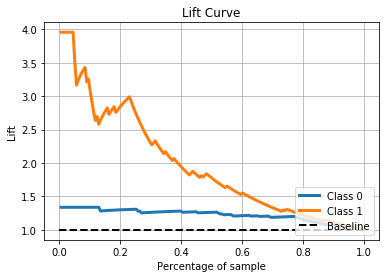

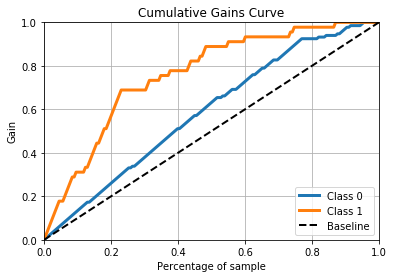

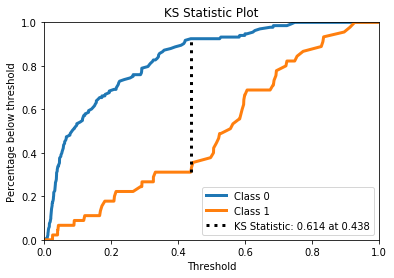

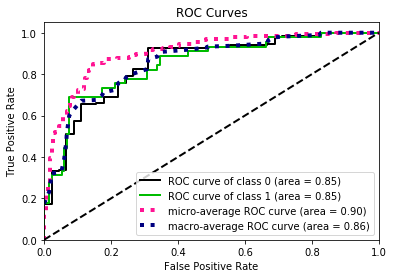

In [22]:
skplt.metrics.plot_lift_curve(wines_pca['Strong'], pred.T)
skplt.metrics.plot_cumulative_gain(wines_pca['Strong'], pred.T)
skplt.metrics.plot_ks_statistic(wines_pca['Strong'], pred.T)
skplt.metrics.plot_roc_curve(wines_pca['Strong'], pred.T)